In [7]:
# import the necessary packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [8]:
# loading the traffic crash csv file
# create a data folder inside the project1 root folder. add the csv file inside data folder
df = pd.read_csv('data/traffic_crash_19-21.csv')

In [9]:
# dropping unnecessary columns
df = df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'LANE_CNT', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I',
         'DEVICE_CONDITION', 'ALIGNMENT', 'REPORT_TYPE', 'CRASH_TYPE', 'SEC_CONTRIBUTORY_CAUSE',
             'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'NUM_UNITS', 'INJURIES_FATAL', 
             'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION'
              , 'INJURIES_UNKNOWN', 'DOORING_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I'], axis=1)

In [10]:
#looking at the data
# changing the column name to match with gpd geometry file to merge later
df = df.rename(columns={'BEAT_OF_OCCURRENCE' : 'beat_num'})
# head of the data
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,...,STREET_NAME,beat_num,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,07/22/2019 12:00:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,NO DEFECTS,Y,...,87TH ST,423,INCAPACITATING INJURY,1.0,12,2,7,41.737337,-87.563560,POINT (-87.563560484875 41.737337119112)
1,08/22/2019 03:37:00 PM,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,NO DEFECTS,Y,...,BERTEAU AVE,1624,NONINCAPACITATING INJURY,2.0,15,5,8,41.956477,-87.785397,POINT (-87.785397003369 41.95647650879)
2,05/25/2020 06:40:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,Y,...,IRVING PARK RD,1923,NO INDICATION OF INJURY,0.0,18,2,5,41.954425,-87.651324,POINT (-87.65132401707 41.954425018612)
3,03/15/2020 08:30:00 PM,25,TRAFFIC SIGNAL,CLEAR,UNKNOWN,REAR END,NOT DIVIDED,DRY,NO DEFECTS,Y,...,NORTH AVE,2533,NO INDICATION OF INJURY,0.0,20,1,3,41.909734,-87.746245,POINT (-87.746244972959 41.909733890131)
4,08/26/2019 03:18:00 AM,45,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,NaN,...,CORNELL DR,331,NONINCAPACITATING INJURY,3.0,3,2,8,41.780613,-87.584253,POINT (-87.584253401508 41.780612873198)


In [11]:
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,beat_num,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,313782.000000,313782.000000,313782.000000,313047.000000,313782.000000,313782.000000,313782.000000,311495.000000,311495.000000
mean,28.471257,3749.216271,1235.243503,0.203305,13.265076,4.130160,6.520623,41.852201,-87.674719
std,5.876546,2869.405332,700.382069,0.582051,5.613864,1.991578,3.343461,0.312269,0.631216
min,0.000000,0.000000,111.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,1315.000000,712.000000,0.000000,10.000000,2.000000,4.000000,41.779032,-87.722597
50%,30.000000,3248.000000,1132.000000,0.000000,14.000000,4.000000,7.000000,41.871741,-87.674813
75%,30.000000,5630.000000,1813.000000,0.000000,17.000000,6.000000,9.000000,41.923550,-87.633558
max,70.000000,13799.000000,6100.000000,21.000000,23.000000,7.000000,12.000000,42.022780,0.000000


In [12]:
# converting date and time of column 'DATE_POLICE_NOTIFIED'
df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])

In [13]:
# converting date and time of column 'CRASH_DATE'
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [14]:
# create new dataframes for each of the three years
df_copy = df.copy(deep = True)
df_2019 = df_copy[df_copy['CRASH_DATE'].dt.year == 2019]
df_2020 = df_copy[df_copy['CRASH_DATE'].dt.year == 2020]
df_2021 = df_copy[df_copy['CRASH_DATE'].dt.year == 2021]

# output for testing
# df_2019
# df_2020
# df_2021

In [15]:
# subract 'CRASH_DATE' from 'DATE_POLICE_NOTIFIED' for each year
not_length_2019 = df_2019['DATE_POLICE_NOTIFIED'] - df_2019['CRASH_DATE']
not_length_2020 = df_2020['DATE_POLICE_NOTIFIED'] - df_2020['CRASH_DATE']
not_length_2021 = df_2021['DATE_POLICE_NOTIFIED'] - df_2021['CRASH_DATE']

# output for testing
# not_length_2019
# not_length_2020
# not_length_2021

In [16]:
# find the mean for each year
mean_2019 = not_length_2019.mean()
mean_2020 = not_length_2020.mean()
mean_2021 = not_length_2021.mean()

# output for testing
# mean_2019
# mean_2020
# mean_2021

<AxesSubplot:title={'center':'Average Time of Notifying Police After Crash Per Year'}, xlabel='Year'>

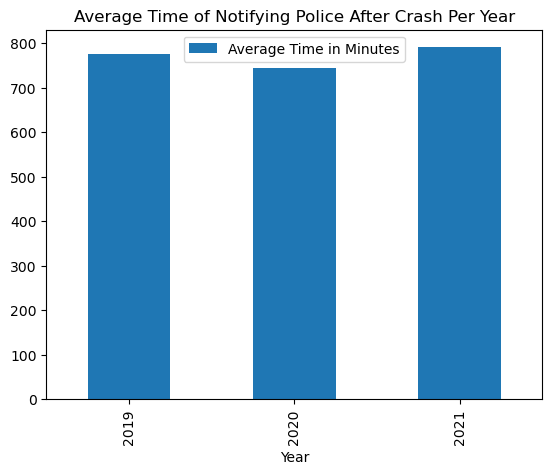

In [17]:
# bar chart displaying the average time it takes police to be notified after a crash in minutes
diction = {'Year': [2019, 2020, 2021], 'Average Time in Minutes': [776, 744, 791]}
dFrame = pd.DataFrame(data = diction)
dFrame.plot('Year', kind = 'bar', title = 'Average Time of Notifying Police After Crash Per Year')

In [18]:
# for testing purposes, display the maximum and minimum crash dates of the entire subset
print(df['CRASH_DATE'].max(), df['CRASH_DATE'].min())

2021-12-12 23:57:00 2019-01-01 00:00:00


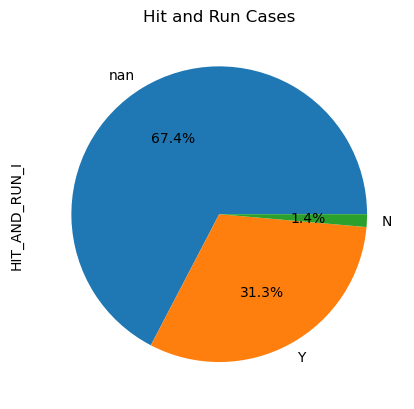

In [19]:
# whether the crash is related with hit and run visualized using a pie chart
plt.figure()
plt.title('Hit and Run Cases')
# plt.xlabel('Count')
plt.ylabel('Attribute')
df['HIT_AND_RUN_I'].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')
# df.plot.pie(y='HIT_AND_RUN_I')
plt.show()

In [20]:
# filtering the data based on years
df_ad = df.copy(deep=True)
# group the data by date and year to get the number of crashes by month per year
aggregation = df_ad.groupby([df_ad['CRASH_DATE'].dt.year, df_ad['CRASH_DATE'].dt.month]).count()
aggregation


CRASH_DATE  POSTED_SPEED_LIMIT  TRAFFIC_CONTROL_DEVICE  \
CRASH_DATE CRASH_DATE                                                           
2019       1                 9116                9116                    9116   
           2                 8625                8625                    8625   
           3                 9748                9748                    9748   
           4                 9446                9446                    9446   
           5                10709               10709                   10709   
           6                10706               10706                   10706   
           7                10661               10661                   10661   
           8                 9941                9941                    9941   
           9                 9815                9815                    9815   
           10                9938                9938                    9938   
           11                9640                9640                    9640   
           12                9417                9417                    9417   
2020       1                 8680                8680                    8680   
           2                 9019                9019                    9019   
           3                 6672                6672                    6672   
           4                 4431                4431                    4431   
           5                 6548                6548                    6548   
           6                 7680                7680                    7680   
           7                 9042                9042                    9042   
           8                 9160                9160                    9160   
           9                 8286                8286                    8286   
           10                8353                8353                    8353   
           11                6963                6963                    6963   
           12                7254                7254                    7254   
2021       1                 7072                7072                    7072   
           2                 8399                8399                    8399   
           3                 7679                7679                    7679   
           4                 8168                8168                    8168   
           5                 9649                9649                    9649   
           6                10335               10335                   10335   
           7                10015               10015                   10015   
           8                 9987                9987                    9987   
           9                 9896                9896                    9896   
           10               10271               10271                   10271   
           11                8773                8773                    8773   
           12                3688                3688                    3688   

                       WEATHER_CONDITION  LIGHTING_CONDITION  \
CRASH_DATE CRASH_DATE                                          
2019       1                        9116                9116   
           2                        8625                8625   
           3                        9748                9748   
           4                        9446                9446   
           5                       10709               10709   
           6                       10706               10706   
           7                       10661               10661   
           8                        9941                9941   
           9                        9815                9815   
           10                       9938                9938   
           11                       9640                9640   
           12                       9417                9417   
2020       1                        8680        

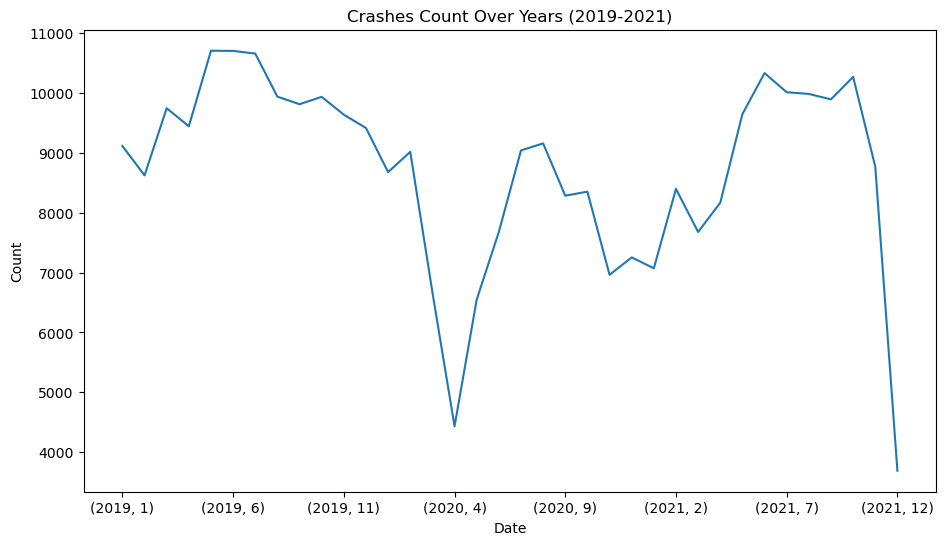

In [21]:
# plotting the number of crashes over the years (2019 - 2021)
# xLabelList = aggregation.index.to_list()
# newXlabel = pd.date_range('2019-01-01','2021-12-12', 
#               freq='MS').strftime("%Y-%b").tolist()
# print(newXlabel)
plt.figure(figsize=(11,6))
plt.title('Crashes Count Over Years (2019-2021)')
plt.ylabel('Count')
aggregation['POSTED_SPEED_LIMIT'].plot(xlabel='')
plt.xlabel('Date')
plt.show()

In [22]:
# attribute values
print(df.columns.values)

['CRASH_DATE' 'POSTED_SPEED_LIMIT' 'TRAFFIC_CONTROL_DEVICE'
 'WEATHER_CONDITION' 'LIGHTING_CONDITION' 'FIRST_CRASH_TYPE'
 'TRAFFICWAY_TYPE' 'ROADWAY_SURFACE_COND' 'ROAD_DEFECT' 'HIT_AND_RUN_I'
 'DAMAGE' 'DATE_POLICE_NOTIFIED' 'PRIM_CONTRIBUTORY_CAUSE' 'STREET_NO'
 'STREET_DIRECTION' 'STREET_NAME' 'beat_num' 'MOST_SEVERE_INJURY'
 'INJURIES_TOTAL' 'CRASH_HOUR' 'CRASH_DAY_OF_WEEK' 'CRASH_MONTH'
 'LATITUDE' 'LONGITUDE' 'LOCATION']


In [23]:
# data head
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,...,STREET_NAME,beat_num,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,2019-07-22 12:00:00,30,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,NO DEFECTS,Y,...,87TH ST,423,INCAPACITATING INJURY,1.0,12,2,7,41.737337,-87.563560,POINT (-87.563560484875 41.737337119112)
1,2019-08-22 15:37:00,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,NO DEFECTS,Y,...,BERTEAU AVE,1624,NONINCAPACITATING INJURY,2.0,15,5,8,41.956477,-87.785397,POINT (-87.785397003369 41.95647650879)
2,2020-05-25 18:40:00,30,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,Y,...,IRVING PARK RD,1923,NO INDICATION OF INJURY,0.0,18,2,5,41.954425,-87.651324,POINT (-87.65132401707 41.954425018612)
3,2020-03-15 20:30:00,25,TRAFFIC SIGNAL,CLEAR,UNKNOWN,REAR END,NOT DIVIDED,DRY,NO DEFECTS,Y,...,NORTH AVE,2533,NO INDICATION OF INJURY,0.0,20,1,3,41.909734,-87.746245,POINT (-87.746244972959 41.909733890131)
4,2019-08-26 03:18:00,45,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,NaN,...,CORNELL DR,331,NONINCAPACITATING INJURY,3.0,3,2,8,41.780613,-87.584253,POINT (-87.584253401508 41.780612873198)


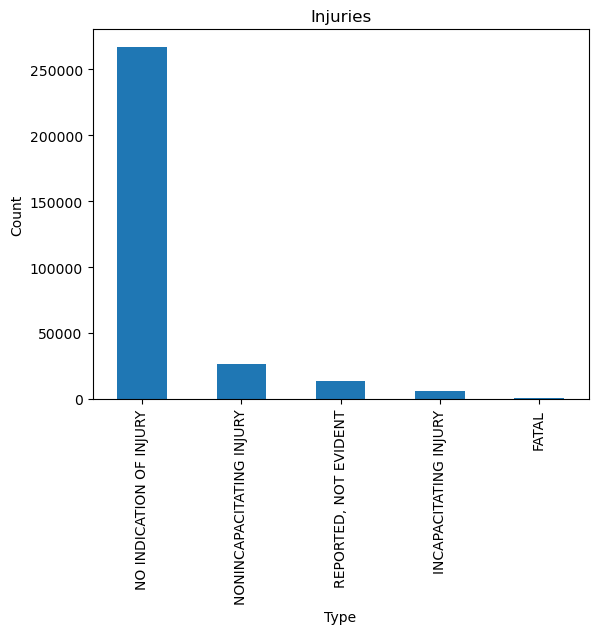

In [24]:
# list of injuries visualized as a bar chart
plt.figure()
plt.title('Injuries')
plt.xlabel('Type')
plt.ylabel('Count')
df['MOST_SEVERE_INJURY'].value_counts().plot(kind='bar')
plt.show()


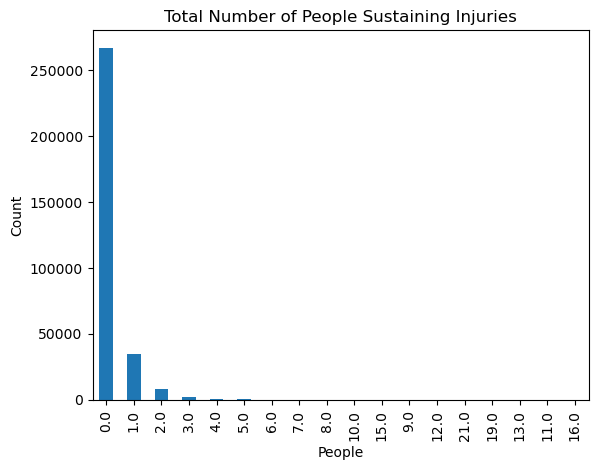

In [25]:
# total injuries visualized as a bar chart
plt.figure()
plt.title('Total Number of People Sustaining Injuries')
plt.xlabel('People')
plt.ylabel('Count')
df['INJURIES_TOTAL'].value_counts().plot(kind='bar')
plt.show()

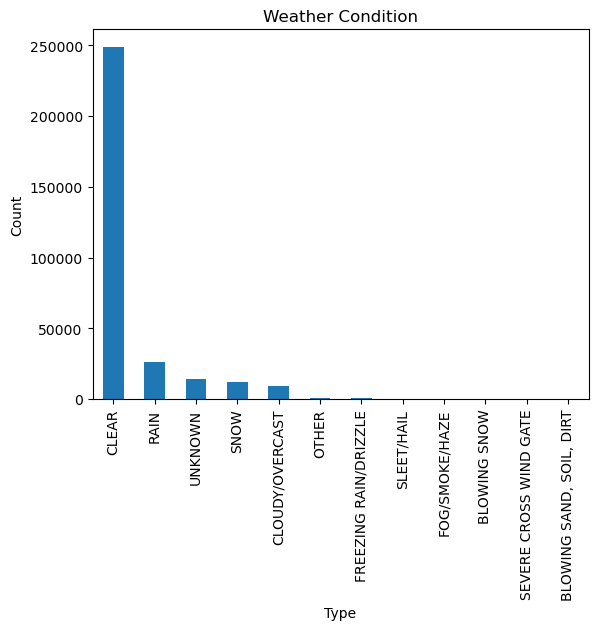

In [26]:
# weather condition as a bar chart
plt.figure()
plt.title('Weather Condition')
plt.xlabel('Type')
plt.ylabel('Count')
df['WEATHER_CONDITION'].value_counts().plot(kind='bar')
plt.show()


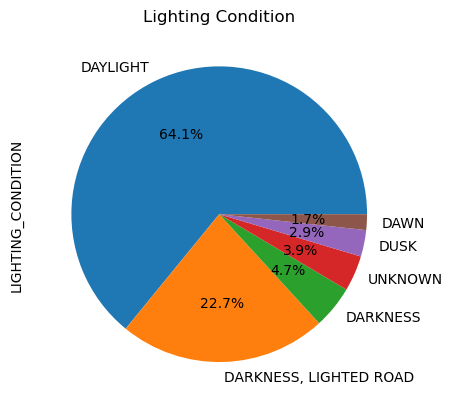

In [27]:
# lighting condition as a pie chart
plt.figure()
plt.title('Lighting Condition')
# plt.xlabel('Type')
plt.ylabel('Count')
df['LIGHTING_CONDITION'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()



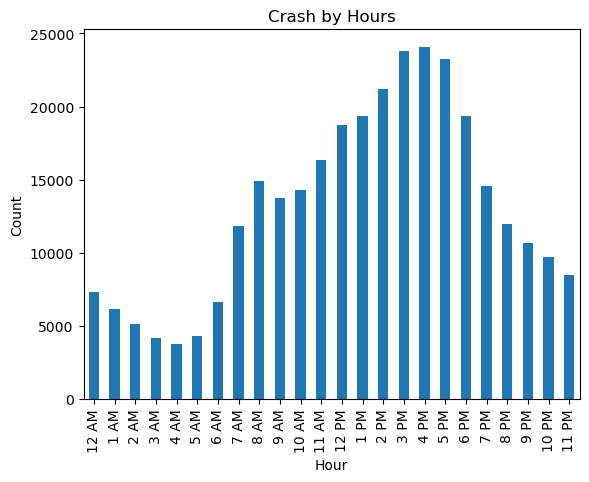

In [28]:
# 'CRASH_HOUR' - visualize the number of crashes per hour as a bar chart
plt.figure()
plt.title('Crash by Hours')
plt.xlabel('Hour')
plt.ylabel('Count')
df['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
           '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
            '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
plt.show()
#  'CRASH_MONTH'

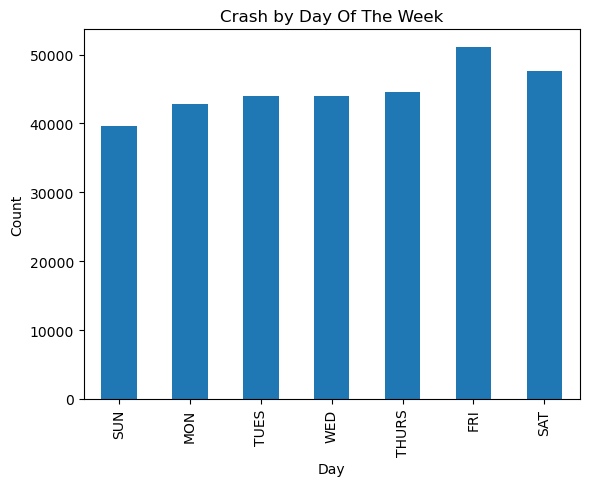

In [29]:
# 'CRASH_DAY_OF_WEEK' - visualize the number of crashes based on the day of the week as a bar chart
plt.figure()
plt.title('Crash by Day Of The Week')
plt.xlabel('Day')
plt.ylabel('Count')
df['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1,2,3,4,5,6],['SUN', 'MON', 'TUES', 'WED', 'THURS', 'FRI', 'SAT'])
plt.show()

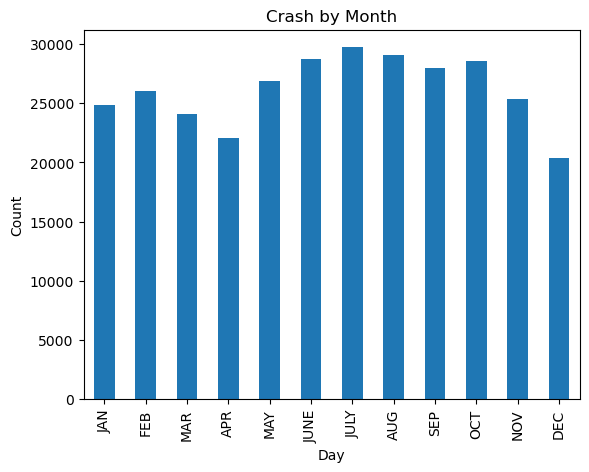

In [30]:
# 'CRASH_MONTH' - visualize the number of crashes by month as a bar chart
plt.figure()
plt.title('Crash by Month')
plt.xlabel('Day')
plt.ylabel('Count')
df['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

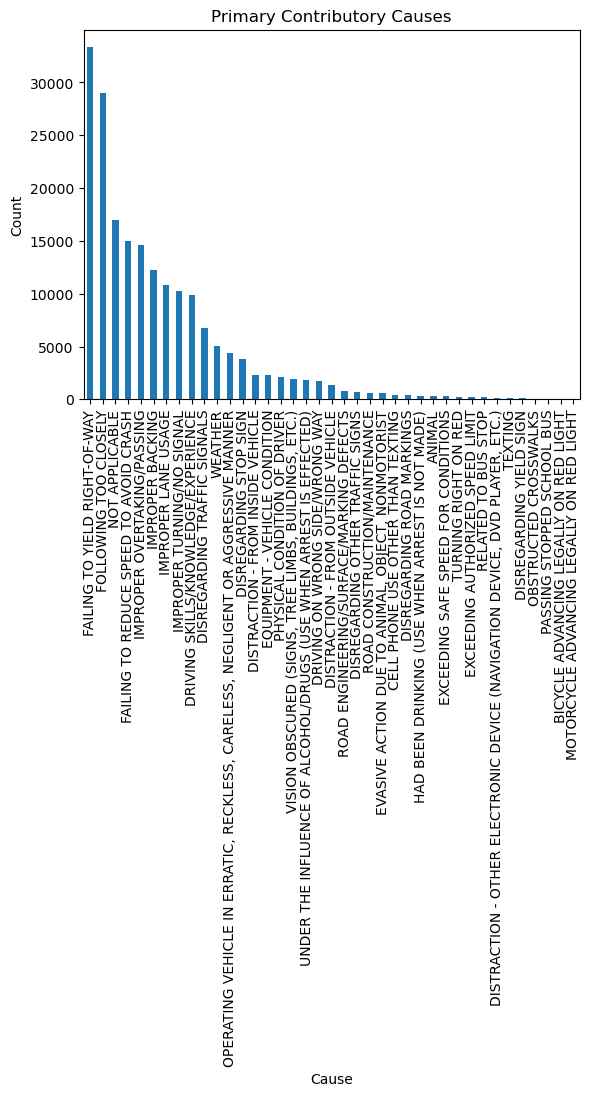

In [31]:
# primary cause of crash as a bar chart
plt.figure()
plt.title('Primary Contributory Causes')
plt.xlabel('Cause')
plt.ylabel('Count')
primaryCause = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
# deleting unable to determine
del primaryCause['UNABLE TO DETERMINE']
primaryCause.plot(kind='bar')
plt.show()


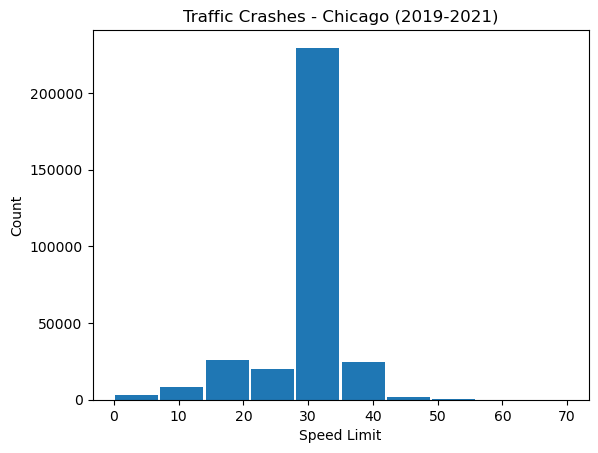

In [32]:
# visualize the number of crashes that have occurred at a given speed limit as a bar chart
plt.figure()
plt.title('Traffic Crashes - Chicago (2019-2021)')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
# speedLimit = df['POSTED_SPEED_LIMIT'].value_counts().sort_index()
# speedLimit.plot(kind='bar')
plt.hist(df['POSTED_SPEED_LIMIT'], rwidth=0.95)
plt.show()


In [33]:
# loading the shape file - police beats 
shapeFile = 'data/Boundaries_Police_Beats.zip'
chicago = gpd.read_file(shapeFile)

In [34]:
# looking at the shape file
chicago

,beat,beat_num,district,sector,geometry
0,1,1713,17,1,"POLYGON ((-87.70473 41.97577, -87.70472 41.975..."
1,0,3100,31,0,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
2,5,1651,16,5,"POLYGON ((-87.90684 41.97656, -87.91070 41.975..."
3,1,1914,19,1,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
4,1,1915,19,1,"POLYGON ((-87.63724 41.96599, -87.63644 41.965..."
...,...,...,...,...,...
272,1,0314,03,1,"POLYGON ((-87.58879 41.78612, -87.58844 41.786..."
273,2,0825,08,2,"POLYGON ((-87.67917 41.78656, -87.67912 41.784..."
274,1,0313,03,1,"POLYGON ((-87.60854 41.78583, -87.60808 41.785..."
275,2,0823,08,2,"POLYGON ((-87.69354 41.78458, -87.69354 41.784..."


<AxesSubplot:>

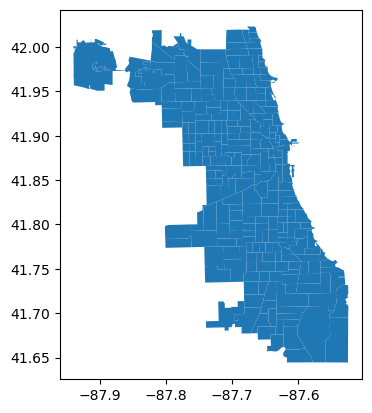

In [35]:
chicago.plot()

In [36]:
# converting the beat number to integars 
df['beat_num']=df['beat_num'].astype(int)
chicago['beat_num']=chicago['beat_num'].astype(int)


<AxesSubplot:>

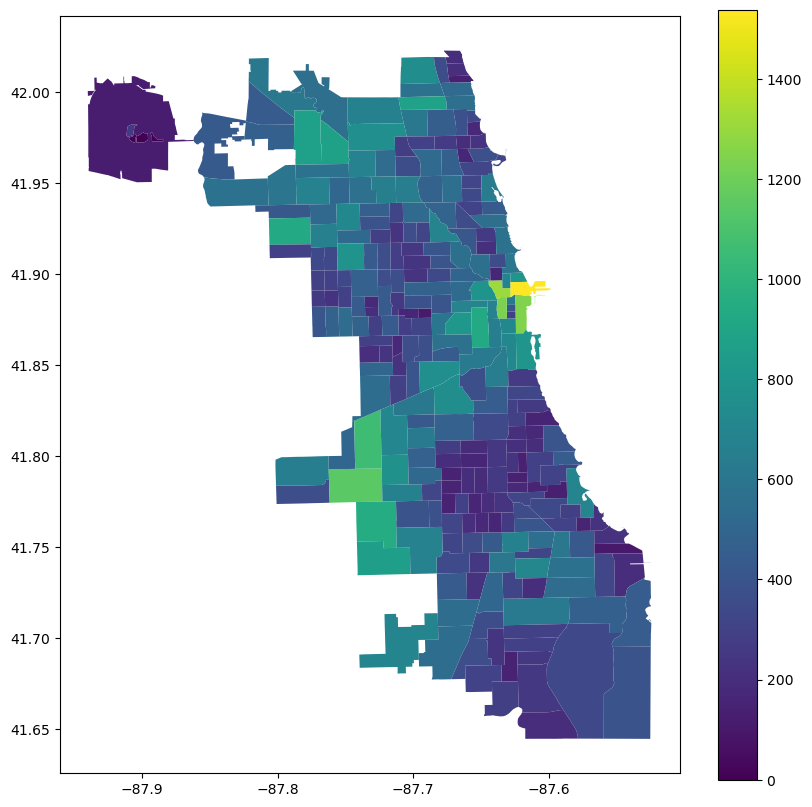

In [37]:
# plotting crash count in 2019 over the chicago area
chicago19 = df[df['CRASH_DATE'].dt.year == 2019]
result19 = chicago19.groupby('beat_num').count()
result19 = result19.filter(['LOCATION'])
result19 = result19.rename(columns={'LOCATION':'count'})
# print(result19)
merged19 = pd.merge(result19, chicago, right_on='beat_num', left_index=True)
merged19 = merged19.set_geometry('geometry')
merged19.plot('count', legend=True, figsize=(10,10))


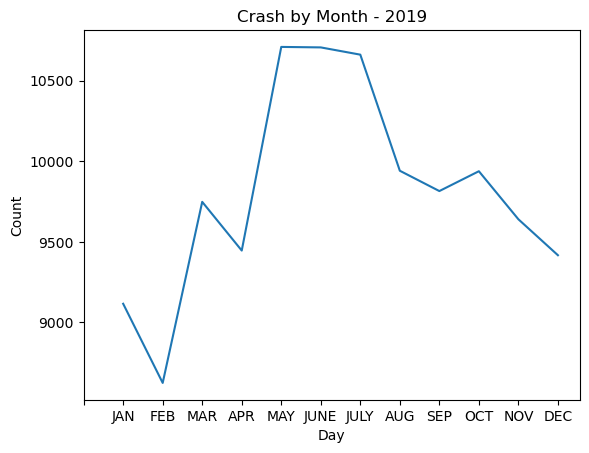

In [38]:
# 'CRASH_MONTH - crashes by month in 2019 in a line chart'
plt.figure()
plt.title('Crash by Month - 2019')
plt.xlabel('Day')
plt.ylabel('Count')
chicago19['CRASH_MONTH'].value_counts().sort_index().plot(kind='line')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11, 12],['','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

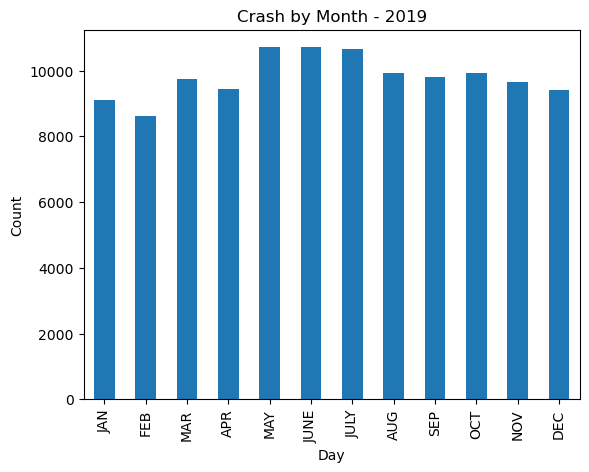

In [39]:
# 'CRASH_MONTH - crashes by month in 2019 in a bar chart'
plt.figure()
plt.title('Crash by Month - 2019')
plt.xlabel('Day')
plt.ylabel('Count')
chicago19['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

<AxesSubplot:>

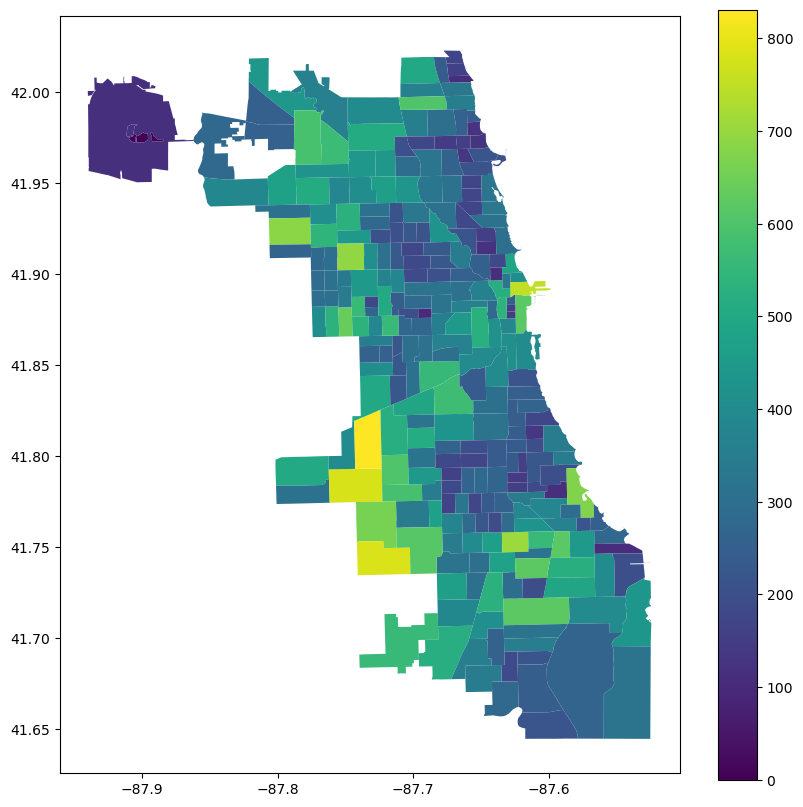

In [40]:
# plotting crash count in 2020 over the chicago area
chicago20 = df[df['CRASH_DATE'].dt.year == 2020]
result20 = chicago20.groupby('beat_num').count()
result20 = result20.filter(['LOCATION'])
result20 = result20.rename(columns={'LOCATION':'count'})
# print(result19)
merged20 = pd.merge(result20, chicago, right_on='beat_num', left_index=True)
merged20 = merged20.set_geometry('geometry')
merged20.plot('count', legend=True, figsize=(10,10))

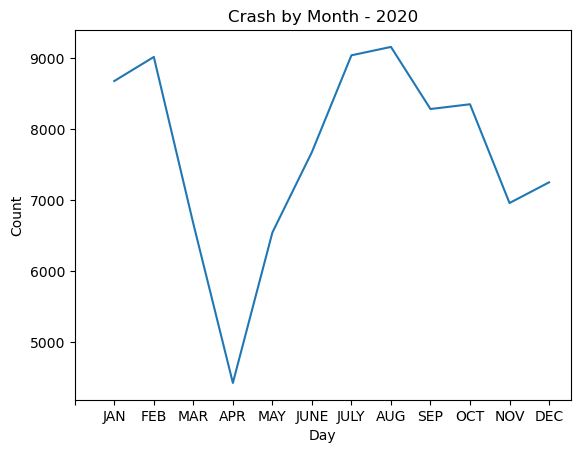

In [41]:
# 'CRASH_MONTH - crashes by month in 2020 in a line chart'
plt.figure()
plt.title('Crash by Month - 2020')
plt.xlabel('Day')
plt.ylabel('Count')
chicago20['CRASH_MONTH'].value_counts().sort_index().plot(kind='line')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11, 12],['','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

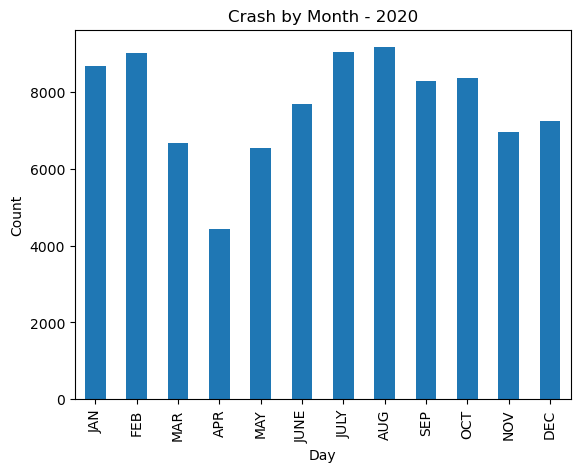

In [42]:
# 'CRASH_MONTH - crashes by month in 2020 in a bar chart'
plt.figure()
plt.title('Crash by Month - 2020')
plt.xlabel('Day')
plt.ylabel('Count')
chicago20['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

<AxesSubplot:>

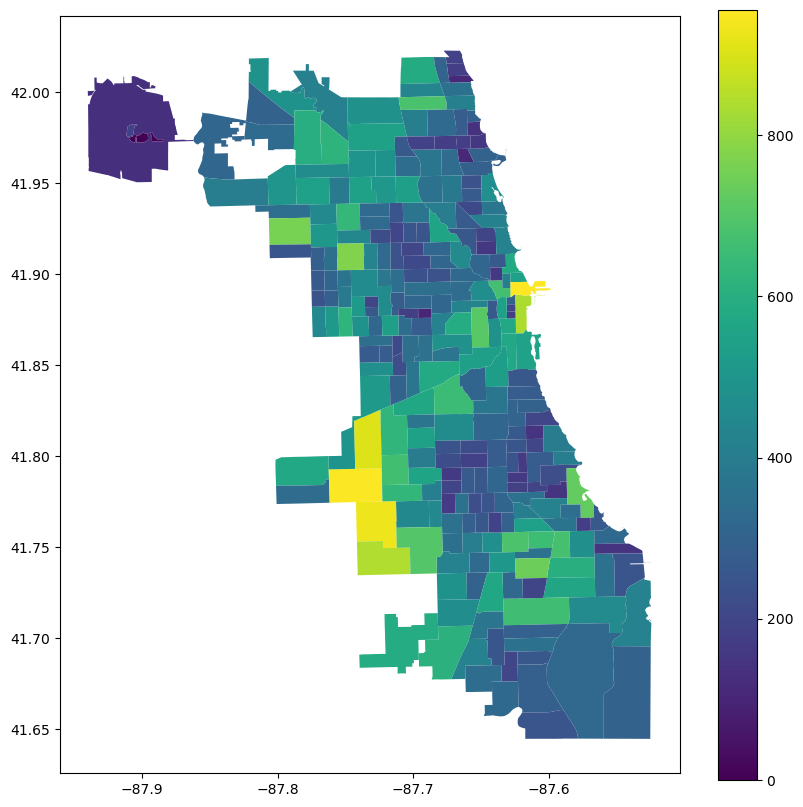

In [43]:
# plotting crash count in 2021 over the chicago area
chicago21 = df[df['CRASH_DATE'].dt.year == 2021]
result21 = chicago21.groupby('beat_num').count()
result21 = result21.filter(['LOCATION'])
result21 = result21.rename(columns={'LOCATION':'count'})
# print(result19)
merged21 = pd.merge(result21, chicago, right_on='beat_num', left_index=True)
merged21 = merged21.set_geometry('geometry')
merged21.plot('count', legend=True, figsize=(10,10))

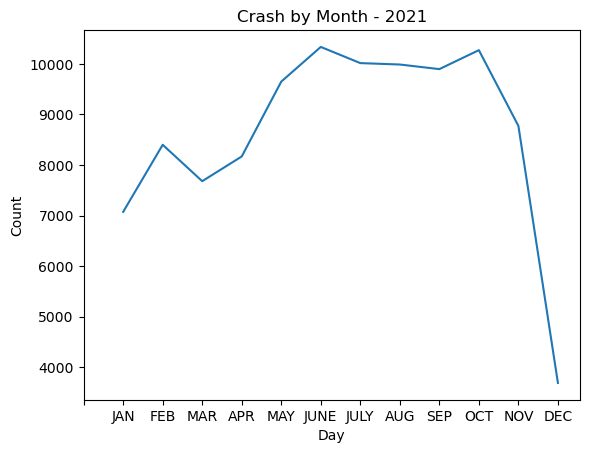

In [44]:
# 'CRASH_MONTH - crashes by month in 2021 in a line chart'
plt.figure()
plt.title('Crash by Month - 2021')
plt.xlabel('Day')
plt.ylabel('Count')
chicago21['CRASH_MONTH'].value_counts().sort_index().plot(kind='line')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11, 12],['','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()

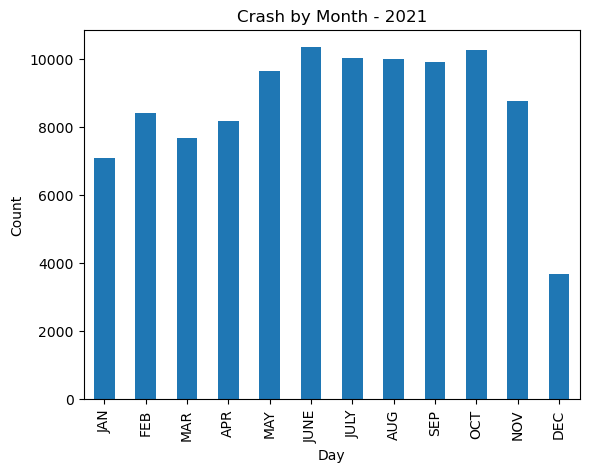

In [45]:
# 'CRASH_MONTH - crashes by month in 2021 in a bar chart'
plt.figure()
plt.title('Crash by Month - 2021')
plt.xlabel('Day')
plt.ylabel('Count')
chicago21['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11],['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY',
                                         'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.show()